### 문제


In [1]:
! # 시작시간 체크

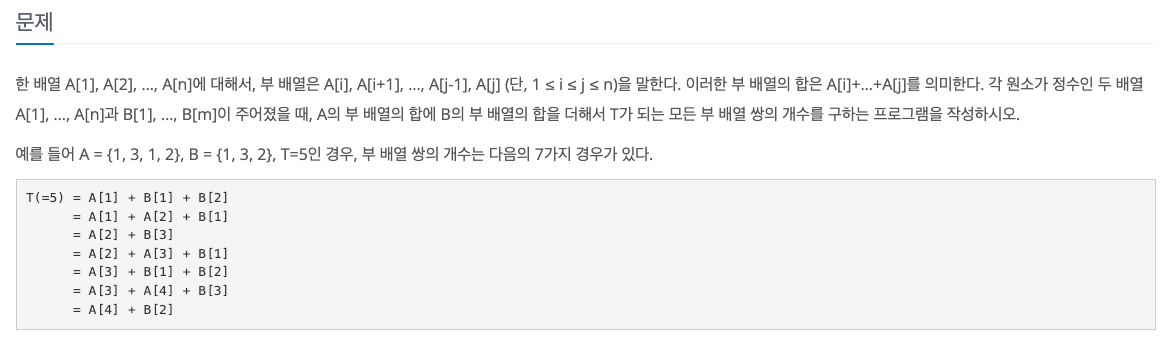

요약

    두개의 배열 A와 B가 있다. A의 부배열과 B의 부배열의 합이 T가 되는 부배열 쌍의 개수를 구하는 문제.
    부배열 이란? 배열 A가 1~n까지 원소가 있을 때, (1 <= i <= j <= n) 을 만족하는 i, j에 대해, A[i] ~ A[j]까지의 합.
    즉, 부배열 이란 배열A의 내부에 연속되는 원소간의 합

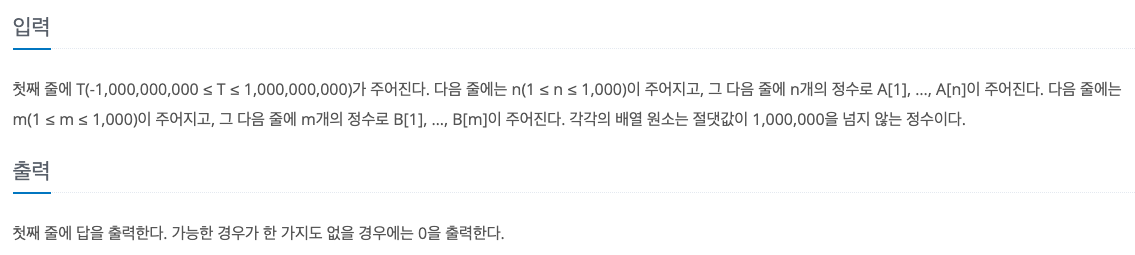

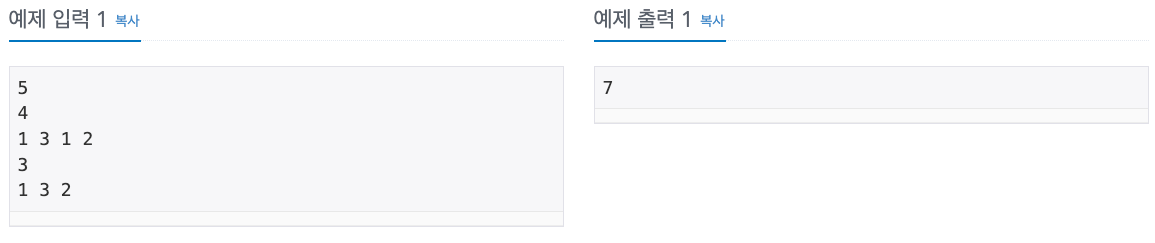

상상코딩
    
    배열 A와 B의 최대개수인 n은 1000개 이하.
    이중 for 문으로 A를 탐색하며 부분합을 구한 A_cumsum_li를 만들고 정렬
    이중 for 문으로 B를 탐색하며 부분합을 구한 B_cumsum_li를 만들고 정렬
    A_cumsum_li를 set으로 중복제거하고 정렬하여, 차례로 for문을 돌며 T에서 뺀값을 t라고 하자
    bisect_left와 bisect_right로 B_cumsum_li에서 짝지어지는 부배열 개수를 구해가며 result에 더해간다

In [3]:
! # 끝 시간 체크

### 풀이

In [ ]:
from collections import Counter

T = int(input())
n = int(input())
A = list(map(int,input().split()))
m = int(input())
B = list(map(int,input().split()))

result=0; c = Counter()

for s in range(n):
    for e in range(s,n):
        c[sum(A[s:e+1])] += 1
        
for s in range(m):
    for e in range(s,m):
        t = T - sum(B[s:e+1])
        result += c[t]
print(result)

### 주석 달린 풀이

In [ ]:
from collections import Counter

T = int(input()) # 부 배열의 합으로 만족되야 하는 값
n = int(input()) # 배열 A의 원소 개수
A = list(map(int,input().split())) # 배열 A
m = int(input()) # 배열 B의 원소 개수
B = list(map(int,input().split())) # 배열 B

result = 0 # 출력할 값 0으로 초기화
c = Counter() # 카운터 c 정의

for s in range(n):
    for e in range(s,n):
        c[sum(A[s:e+1])] += 1 # 배열 A의 모든 부배열의 합을 카운터에 개수로 센다
        
for s in range(m):
    for e in range(s,m):
        t = T - sum(B[s:e+1]) # 타겟 값 T에서 B의 부배열합을 뺀 값이
        result += c[t] # A의 부배열에 존재하면 result에 더해준다. 없으면 저절로 0이 나온다.
print(result)

해설

    배열 A의 모든 부 배열의 합을 탐색하며 그 합의 값을 Key로 하고, 그 개수를 값으로하는 딕셔너리(여기선 Counter로 사용)를 c로 만듭니다.
    배열 B의 모든 부 배열의 합을 탐색하며, T에서 B의 부 배열합을 뺀 값이 c에 존재하면 그 값을 result에 더해나갑니다.

### bisect 풀이

In [68]:
import bisect

T = int(input()) # 부 배열의 합으로 만족되야 하는 값
n = int(input()) # 배열 A의 원소 개수
A = list(map(int,input().split())) # 배열 A
m = int(input()) # 배열 B의 원소 개수
B = list(map(int,input().split())) # 배열 B

result = 0 # 출력할 값 0으로 초기화
Asum,Bsum=A,B

for s in range(n):
    for e in range(s,n):
        Asum.append(sum(A[s:e+1])) # 배열 A의 모든 부배열의 합을 추가해준다.
for s in range(m):
    for e in range(s,m):
        Bsum.append(sum(B[s:e+1]))# 배열 A의 모든 부배열의 합을 추가해준다.

Asum.sort();Bsum.sort()

for i in range(len(Asum)):
    l = bisect.bisect_left(Bsum, T-Asum[i])
    r = bisect.bisect_right(Bsum, T-Asum[i])
    result+=r-l
print(result)

5
4
1 3 1 2
3
1 3 2
30


In [70]:
Bsum

[1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7]

In [69]:
Asum

[1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7]

In [78]:
Asum = A
for s in range(n):
    for e in range(s+1,n):
        Asum.append(sum(A[s:e+1])) # 배열 A의 모든 부배열의 합을 추가해준다.
Asum

[1, 3, 1, 2, 4, 5, 7, 4, 6, 3]

In [76]:
Aarr=A
Asum = []
for i in range(n):  #O(A*(A-1)/2)
    s = Aarr[i]
    Asum.append(s)
    for j in range(i+1,n):
        s+=Aarr[j]
        Asum.append(s)

Asum

[1, 4, 5, 7, 3, 4, 6, 1, 3, 2]

In [ ]:
import bisect
T = int(input())
N = int(input())
Aarr = list(map(int,input().split()))
M = int(input())
Barr = list(map(int,input().split()))
Asum = []
Bsum = []
for i in range(N):  #O(A*(A-1)/2)
    s = Aarr[i]
    Asum.append(s)
    for j in range(i+1,N):
        s+=Aarr[j]
        Asum.append(s)
for i in range(M):  #O(B*(B-1)/2)
    s = Barr[i]
    Bsum.append(s)
    for j in range(i+1,M):
        s+=Barr[j]
        Bsum.append(s)
Asum.sort()
Bsum.sort()
answer = 0
for i in range(len(Asum)):
    l = bisect.bisect_left(Bsum,T-Asum[i])
    r = bisect.bisect_right(Bsum,T-Asum[i])
    answer+=r-l
print(answer)

### 연습

In [11]:
n,A,m,B

(4, [1, 3, 1, 2], 3, [1, 3, 2])

In [10]:
from collections import Counter
T = int(input())
n=int(input())
A=list(map(int,input().split()))
m=int(input())
B=list(map(int,input().split()))

5
4
1 3 1 2
3
1 3 2


In [62]:
c = Counter()
c

Counter()

In [63]:
c[1] += 1

In [64]:
c

Counter({1: 1})

In [65]:
c[1283719837]

0

In [66]:
n=5

for s in range(n):
    for e in range(s,n):
        print(s,e)

0 0
0 1
0 2
0 3
0 4
1 1
1 2
1 3
1 4
2 2
2 3
2 4
3 3
3 4
4 4


In [36]:
c

Counter({1: 2, 4: 2, 5: 1, 7: 1, 3: 2, 6: 1, 2: 1})

In [37]:
result=0

In [38]:
for s in range(m):
    for e in range(s,m):
        t=T-sum(B[s:e+1])
        print(t, c[t])
        result+=c[t]

4 2
1 2
-1 0
2 1
0 0
3 2


In [39]:
result

7